# TECH2 Mandatory assignment 2

## About the mandatory assignment

-   The assignment must be completed individually.
-   You are allowed to use all online resources for help, including generative AI. You must include a statement on how you used AI to solve the tasks.
-   After the assignment deadline, you must perform a peer review of two other students' assignment on Canvas. You're not allowed to use AI to write the peer-review for you.
-   Deadline for the assignment: Friday, October 17, 16:00.
-   Deadline for the peer review: Friday, October 24, 16:00.


## Requirements

-   Your solution needs to be uploaded to GitHub. You should fork the assignment repository at
    [https://github.com/richardfoltyn/TECH2-H25-assignment2](https://github.com/richardfoltyn/TECH2-H25-assignment2)
    and add your solution to this notebook.
-   All commits in your repository must be *prior* to the deadline. 
-   You need to make sure that your GitHub repository is publicly accessible. This can be changed in the GitHub repository setttings, if required.
-   You need to submit the URL to the your GitHub repository on Canvas.
-   Make sure your notebook runs without errors (`Restart` and `Run all`). 
-   Your notebook *must* run with the TECH2 environment we've been using in part 2. You can create this environment from the 
    `environment.yml` file in this repository if you haven't done so earlier.


## Tasks

In this assignment, you are asked to analyze a 10% sub-sample of the Survey of Consumer Finances (SCF), a survey of household portfolios that is representative of the US population. The survey was administered every 3 years from 1989 to 2022. The appendix in this document contains a description of the variables present in this data set (this is a subset; the original SCF contains many more variables).

1.  Data preprocessing

    1.  Read the CSV file `SCF_10pct.csv` stored in this repository.
    2.  Keep only observations where the household head is aged between 25 and 89. 
    3.  Create the column `'college'`, which contains an indicator variable that is 1 when the household head has at least some college (column `'educ'` is 3 or 4), and 0 otherwise.
    4.  Divide the values in the column `'networth'` by 1,000 so that they are reported in thousands of US dollars.
    5.  Report the number of observations in the final sample.

2.  In this part, you're asked to analyze how net worth (total gross assets minus total debt) varies across the four education levels (no high school, high school, some college, 4-year college or more):

    1.  Compute the average net worth (in thousands of US dollars) by education (use a loop).
    2.  Create a bar chart that plots the average net worth by education.

3.  In this part, you're asked to analyze how net worth has changed over the last 3 decades:

    1.  Compute the average net worth (in thousands of US dollars) by survey year (use a loop).
    2.  Create a line plot that shows the evolution of average net worth over the years 1989 to 2022.

4.  Finally, combine the analyses from the previous parts to see how net worth evolved over the years for those with and without college.

    1.  Compute the average net worth (in thousands of US dollars) by survey year, separately for non-college (`college=0`) and the college-educated (`college=1`).
    2.  Create a line plot that shows the evolution of net worth over the years 1989 to 2022 by college status, i.e., your figure should contain two lines, one for college and one for non-college.

Remember to add axis labels, titles, and legends (where applicable) to all your figures.


## Hints

-   The assignment can be solved using the concepts we covered up to and including lecture/workshop 3 on Friday, October 10. 
-   In particular, you don't need `groupby()` which we'll cover later in the course, but you can instead loop over education levels or years, as needed.

***
**WRITE YOUR SOLUTION TO PARTS 1-4 HERE**

Number of observations in final sample: 5471
No HS/GED: 154.41 thousand USD
HS/GED: 279.35 thousand USD
Some College/Assoc.: 1107.28 thousand USD
Bachelor+: 1677.32 thousand USD


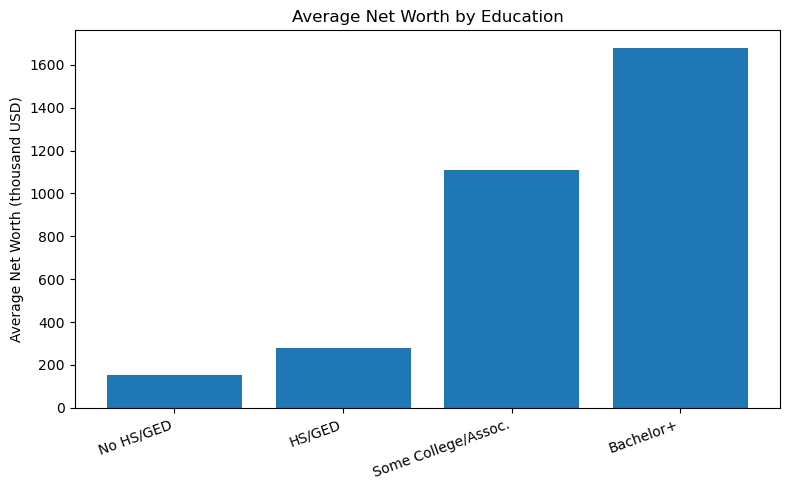

1989: 873.86 thousand USD
1992: 384.14 thousand USD
1995: 487.89 thousand USD
1998: 911.88 thousand USD
2001: 510.17 thousand USD
2004: 725.36 thousand USD
2007: 1471.39 thousand USD
2010: 603.62 thousand USD
2013: 915.59 thousand USD
2016: 890.47 thousand USD
2019: 734.01 thousand USD
2022: 2458.33 thousand USD


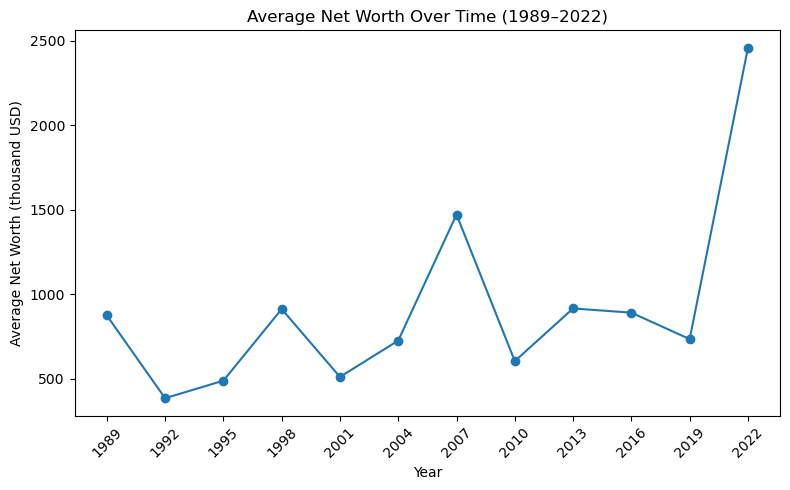

1989: non-college = 202.62, college = 1727.25 thousand USD
1992: non-college = 204.44, college = 568.61 thousand USD
1995: non-college = 247.17, college = 711.43 thousand USD
1998: non-college = 283.37, college = 1426.57 thousand USD
2001: non-college = 188.83, college = 795.65 thousand USD
2004: non-college = 339.64, college = 1000.03 thousand USD
2007: non-college = 383.55, college = 2407.75 thousand USD
2010: non-college = 212.50, college = 880.48 thousand USD
2013: non-college = 181.01, college = 1463.70 thousand USD
2016: non-college = 243.53, college = 1233.22 thousand USD
2019: non-college = 174.60, college = 1072.80 thousand USD
2022: non-college = 218.57, college = 3567.34 thousand USD


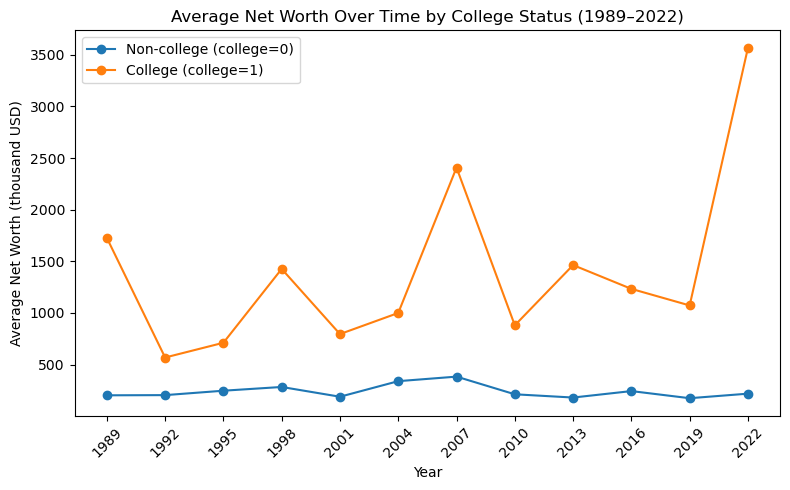

In [3]:

# **Author:** Casper
# **Course:** TECH2


# I used ChatGPT (IDEAS) to help structure the code and basic plotting snippets.



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Helper to make one clean plot per figure (no subplots, no custom colors)
def new_fig():
    plt.figure(figsize=(8, 5))


# ## Part 1 — Data preprocessing
# - Read `SCF_10pct.csv`
# - Keep ages 25–89
# - Create `college` = 1 if educ in {3,4}, else 0
# - Divide `networth` by 1,000 (thousand USD)
# - Print number of observations


# Read
df = pd.read_csv("SCF_10pct.csv")

# Filter by age 25–89
df = df[(df["age"] >= 25) & (df["age"] <= 89)].copy()

# College indicator
df["college"] = np.where(df["educ"].isin([3, 4]), 1, 0)

# Scale net worth to thousands of USD
df["networth"] = df["networth"] / 1000.0

# Report number of observations
print("Number of observations in final sample:", len(df))

# Optional peek
df.head()


# ## Part 2 — Average net worth by education (loop) + bar chart
# Education codes:
# 1 = No HS/GED, 2 = HS/GED, 3 = Some college/Assoc., 4 = Bachelor+

# %%
educ_levels = [1, 2, 3, 4]
educ_labels = {
    1: "No HS/GED",
    2: "HS/GED",
    3: "Some College/Assoc.",
    4: "Bachelor+"
}

# Loop to compute averages (no groupby)
avg_by_educ = []    
for e in educ_levels:
    sub = df[df["educ"] == e]
    avg = sub["networth"].mean()
    avg_by_educ.append(avg)

# Print results
for e, avg in zip(educ_levels, avg_by_educ):
    print(f"{educ_labels[e]}: {avg:.2f} thousand USD")

# Bar chart
new_fig()
x = np.arange(len(educ_levels))
plt.bar(x, avg_by_educ)
plt.xticks(x, [educ_labels[e] for e in educ_levels], rotation=20, ha="right")
plt.ylabel("Average Net Worth (thousand USD)")
plt.title("Average Net Worth by Education")
plt.tight_layout()
plt.show()


# ## Part 3 — Average net worth by year (loop) + line plot


# Sorted unique years
years = sorted(df["year"].unique())

# Loop to compute averages by year
avg_by_year = []
for y in years:
    sub = df[df["year"] == y]
    avg = sub["networth"].mean()
    avg_by_year.append(avg)

# Print results
for y, a in zip(years, avg_by_year):
    print(f"{y}: {a:.2f} thousand USD")

# Line plot
new_fig()
plt.plot(years, avg_by_year, marker="o")
plt.xlabel("Year")
plt.ylabel("Average Net Worth (thousand USD)")
plt.title("Average Net Worth Over Time (1989–2022)")
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Part 4 — Average net worth by year and college status (two lines)

# %%
avg_by_year_nc = []  # non-college (college=0)
avg_by_year_c  = []  # college (college=1)

for y in years:
    sub_y = df[df["year"] == y]

    sub_nc = sub_y[sub_y["college"] == 0]
    sub_c  = sub_y[sub_y["college"] == 1]

    avg_nc = sub_nc["networth"].mean()
    avg_c  = sub_c["networth"].mean()

    avg_by_year_nc.append(avg_nc)
    avg_by_year_c.append(avg_c)

# Print quick check
for y, a0, a1 in zip(years, avg_by_year_nc, avg_by_year_c):
    print(f"{y}: non-college = {a0:.2f}, college = {a1:.2f} thousand USD")

# Two-line plot
new_fig()
plt.plot(years, avg_by_year_nc, marker="o", label="Non-college (college=0)")
plt.plot(years, avg_by_year_c,  marker="o", label="College (college=1)")
plt.xlabel("Year")
plt.ylabel("Average Net Worth (thousand USD)")
plt.title("Average Net Worth Over Time by College Status (1989–2022)")
plt.xticks(years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




***
# Data description

## Variables

| Variable         | Description |
|------------------|-------------|
| id               | Identifier  |
| year             | Survey year |
| age             | Age of reference person (household head) |
| educ            | Education of reference person (1 = no high school/GED, 2 = high school or GED, 3 = some college or Assoc. degree, 4 = Bachelors degree or higher)|
| networth        | Net worth in US dollars |

## Reference

- URL: https://www.federalreserve.gov/econres/scfindex.htm
- DOI Identifier: https://doi.org/10.17016/8799
- Creator: Board of Governors of the Federal Reserve Board
- Name: 2022 Survey of Consumer Finances
- Description:
    The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families' balance sheets, pensions, income, and demographic characteristics.
- Publisher: Board of Governors of the Federal Reserve System
- Publication Year: 2023 